In [41]:
'''
12.800 kaotik değer üzerinden, 
Her değer 8 bit ile ifade edilmiş,
mod 256'a göre işlem yapılmıştır

'''

"\n12.800 kaotik değer üzerinden, \nHer değer 8 bit ile ifade edilmiş,\nmod 256'a göre işlem yapılmıştır\n\n"

#### Gerekli kütüphanelerin projeye eklenmesi

In [42]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import chi2

#### Başlangıç değerlerinin oluşturulması

In [43]:
r = 4 
x_initial = 0.838178032758474
n_iterations = 12_800
n = 256 # mod 256 işlemi alınması istenmiştir

#### Lojistik haritalama fonksiyonun oluşturulması

In [44]:
def logistic_map(x, r):
    return r * x * (1 - x)

##### 12_800 tane değerin Lojistik haritalama fonksiyonuna gönderilmesi ve değerlerin üretilmesi

In [45]:
def Calculate():

     # Değerleri saklamak için dizi oluşturulması
    global key_values
    key_values = np.zeros(n_iterations)
    key_values[0] = logistic_map(x_initial, r)

    # Dizinin oluşturulması
    for i in range(1, n_iterations):
        key_values[i] = logistic_map(key_values[i-1], r)

In [46]:
Calculate() # Fonksiyon çağrılarak hesaplanması sağlanmıştır

##### Üretilen değerlerin txt formatında kaydedilmesi

In [47]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_256_12_800/Key_Values.txt", "w") as file:
    for item in key_values:
        file.write(f"{item:.15f}\n") # 15 basamağa kadar hassasiyetle çalışılmıştır

##### 1. Mod Fonksiyonu

In [48]:
def Mod():

    global mod_values
    mod_values = np.zeros(n_iterations)

    for i in range (1, n_iterations + 1):
        #mod_values[i-1] = int(round(10 * key_values[i-1])) % 10
        mod_values[i-1] = int(1000 * key_values[i-1]) % n # yuvarlama yapmadan hesaplama yapılmıştır.

In [49]:
Mod() # Mod fonksiyonun çağrılması ve değerlerin txt dosyasına yazdırılması

with open("Output/Mod_256_12_800/Mod_Values.txt", "w") as file:
    for item in mod_values:
        file.write(f"{int(item)}\n") 

##### Ki - Kare Değerinin Hesaplanması

In [50]:
# Ki-kare fonksiyonu
def get_chi_square_value(df, alpha):
  
  if alpha <= 0 or alpha >= 1:
    raise ValueError("Alpha değeri 0 ve 1 arasında olmalı.")

  return chi2.ppf(1 - alpha, df)

In [51]:
df = 255  # df = k_max - k_min şeklinde sadeleşebilir. 
alpha_values = [0.995, 0.990, 0.975, 0.95, 0.9, 0.75, 0.5, 0.25, 0.1, 0.05, 0.025, 0.005, 0.025, 0.01, 0.005, 0.001]

for alpha in alpha_values:
  
  chi_square_value = get_chi_square_value(df, alpha)
  print(f"Alpha: {alpha:.3f}, Chi-Square Value: {chi_square_value:.2f}")

Alpha: 0.995, Chi-Square Value: 200.59
Alpha: 0.990, Chi-Square Value: 205.42
Alpha: 0.975, Chi-Square Value: 212.66
Alpha: 0.950, Chi-Square Value: 219.03
Alpha: 0.900, Chi-Square Value: 226.52
Alpha: 0.750, Chi-Square Value: 239.43
Alpha: 0.500, Chi-Square Value: 254.33
Alpha: 0.250, Chi-Square Value: 269.85
Alpha: 0.100, Chi-Square Value: 284.34
Alpha: 0.050, Chi-Square Value: 293.25
Alpha: 0.025, Chi-Square Value: 301.13
Alpha: 0.005, Chi-Square Value: 316.92
Alpha: 0.025, Chi-Square Value: 301.13
Alpha: 0.010, Chi-Square Value: 310.46
Alpha: 0.005, Chi-Square Value: 316.92
Alpha: 0.001, Chi-Square Value: 330.52


#### Modulus --- Gözlemlenen ve Beklenen Değerlerin Frekansları

In [52]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/n] * n

# Gözlenen frekansları hesapla (0'dan 9'a kadar olan sayılar için)
observed = [np.sum(mod_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")


Gözlemlenen frekanslar (observed): [307, 146, 118, 88, 85, 84, 84, 74, 83, 64, 70, 55, 78, 54, 59, 52, 56, 69, 54, 52, 58, 54, 59, 55, 43, 62, 47, 57, 54, 38, 59, 47, 53, 50, 44, 40, 72, 40, 38, 46, 69, 46, 39, 34, 47, 42, 49, 42, 42, 51, 59, 32, 46, 47, 54, 42, 42, 47, 42, 47, 40, 48, 40, 38, 53, 34, 52, 45, 45, 37, 34, 43, 43, 45, 58, 44, 44, 40, 53, 36, 47, 47, 45, 53, 42, 47, 40, 38, 42, 43, 35, 42, 57, 40, 30, 35, 47, 33, 45, 34, 44, 45, 42, 37, 30, 31, 55, 52, 45, 45, 29, 48, 52, 39, 37, 37, 48, 53, 48, 49, 36, 39, 47, 34, 47, 48, 41, 46, 42, 47, 38, 34, 34, 43, 52, 44, 52, 32, 48, 57, 50, 57, 44, 53, 57, 32, 47, 41, 47, 47, 40, 53, 42, 44, 43, 44, 52, 51, 43, 45, 47, 49, 32, 43, 47, 50, 32, 41, 42, 39, 63, 36, 40, 38, 46, 44, 47, 33, 37, 58, 35, 42, 49, 55, 48, 39, 39, 46, 43, 40, 39, 47, 48, 53, 56, 44, 56, 47, 47, 50, 52, 68, 46, 62, 50, 50, 53, 50, 52, 58, 52, 66, 52, 60, 59, 59, 55, 58, 67, 42, 62, 65, 77, 59, 82, 70, 71, 81, 93, 104, 141, 304, 31, 22, 19, 30, 21, 27, 24, 25

##### Modulus --- p_value Değerinin Değerinin Hesaplanması

In [53]:
# chi2_stat: Bu, örneğin gözlenen ve beklenen frekanslar arasındaki farkı test etmek için verilerinizden hesaplanan gerçek Ki kare istatistiğidir. 
# Bu değeri p-değerini hesaplamak için kullanılmakatadır.
def calculate_chi2_stat(observed, expected, epsilon=1e-10):
   
    if len(observed) != len(expected):
        raise ValueError("Gözlenen ve beklenen frekanslar aynı uzunlukta olmalıdır.")
    
    observed = np.array(observed)
    expected = np.array(expected)

    # Beklenen frekanslar 0 olan durumlar için epsilon ekle
    adjusted_expected = np.where(expected == 0, epsilon, expected)
    
    chi2_stat = np.sum((observed - adjusted_expected) ** 2 / adjusted_expected)
    
    return chi2_stat

In [54]:
chi2_stat = calculate_chi2_stat(observed, expected)

In [55]:
# p_value değeri
def calculate_p_value(chi2_stat, df):
    return 1 - chi2.cdf(chi2_stat, df)

In [56]:
calculate_p_value(chi2_stat, df)

0.0

##### Modulus --- Ki-Kare Testi ve Histogramın Çizilmesi

In [57]:
def ki_kare_test_and_hist(decimx, k_min, k_max, step=1):
    n = len(decimx)
    
    Beklenen = np.floor(n / (k_max - k_min + 1))

    # Histogram hesaplama
    R, _ = np.histogram(decimx, bins=range(k_min, k_max + 2))

    Ki_kare = 0

    for i in range(k_min, k_max + 1):
        Ki_kare += (R[i - k_min] - Beklenen) ** 2 / Beklenen

    # Histogram grafiğini çizme
    bars = plt.bar(range(k_min, k_max + 1), R[:k_max - k_min + 1], align='center', alpha=0.7)

    # Bar grafiğinin her bir barı üzerine değerleri ekleme
    for bar in bars:
        yval = bar.get_height()  # Barın yüksekliği (frekans değeri)
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', va='bottom', ha='center')

    plt.xlabel('Değerler')
    plt.ylabel('Frekans')
    plt.title(f'Histogram (Toplam Veri Sayısı: {n:_})')  # Başlığa veri sayısını binlik ayırıcı ile ekleme
    plt.xticks(range(k_min, k_max + 1, step), rotation=45)  # X ekseni etiketlerini 45 derece döndürme

    plt.show()

    return Ki_kare

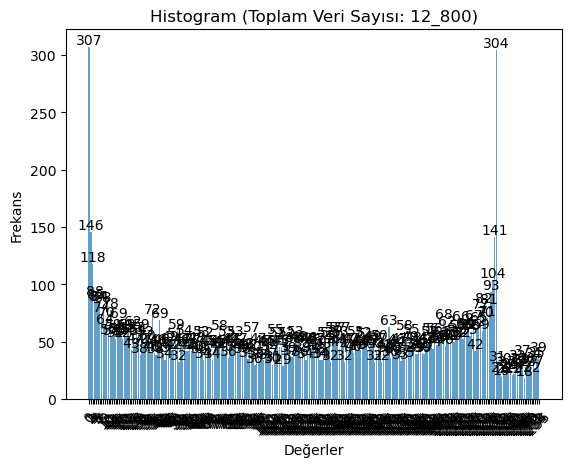

Ki-kare değeri: 3996.079999999999


In [58]:
mod = ki_kare_test_and_hist(mod_values, k_min = 0, k_max = 255, step = 1)
print(f"Ki-kare değeri: {mod}")

##### 2. Fraction Fonksiyonu

In [59]:
# Kesirli kısmı hesaplama fonksiyonu
def fractional_part(x):
    return x - np.floor(x)  # 3.14 - 3 = 0.14

# Çıkan değerin ilk basamağının elde edilmesi
frac_values = np.zeros(n_iterations)

for i in range(1, n_iterations + 1):
    fractional = fractional_part(key_values[i-1])
    frac_values[i-1] = int(fractional * 100) % n

In [60]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_256_12_800/Frac_Values.txt", "w") as file:
    for item in frac_values:
        file.write(f"{int(item)}\n") 

#### Fraction --- Gözlemlenen ve Beklenen Değerlerin Frekansları

In [61]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/n] * n

# Gözlenen frekansları hesapla (0'dan 9'a kadar olan sayılar için)
observed = [np.sum(frac_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [886, 325, 273, 222, 187, 177, 167, 146, 152, 141, 146, 139, 119, 119, 133, 121, 110, 98, 99, 89, 103, 107, 80, 89, 86, 101, 82, 100, 77, 95, 97, 72, 95, 108, 90, 76, 84, 72, 92, 102, 94, 100, 82, 90, 69, 82, 82, 70, 78, 89, 91, 88, 94, 71, 69, 84, 79, 86, 83, 92, 68, 66, 72, 80, 90, 90, 88, 86, 83, 84, 69, 94, 84, 87, 86, 88, 104, 84, 92, 108, 96, 92, 119, 92, 115, 106, 109, 122, 160, 124, 157, 140, 152, 146, 169, 195, 253, 279, 327, 814, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


##### Fraction --- p_value Değerinin Değerinin Hesaplanması

In [62]:
chi2_stat = calculate_chi2_stat(observed, expected)
calculate_p_value(chi2_stat, df)

0.0

##### Fraction --- Ki-Kare Testi ve Histogramın Çizilmesi

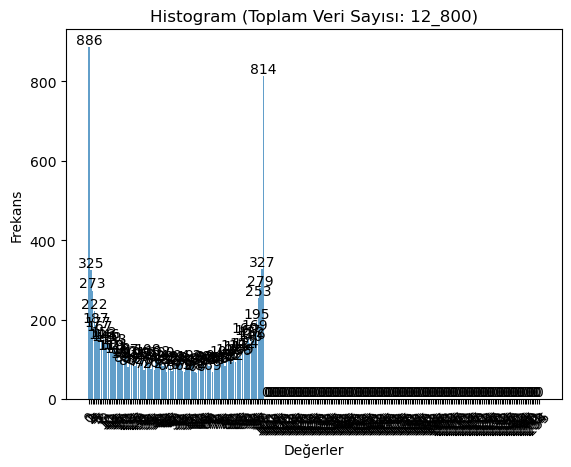

Ki-kare değeri: 46547.75999999999


In [63]:
frac = ki_kare_test_and_hist(frac_values, k_min = 0, k_max = 255, step = 1)
print(f"Ki-kare değeri: {frac}")

##### 3. Threshold Fonksiyonu

In [64]:
threshold = 0.5

threshold_values = np.zeros(n_iterations) 

for i in range(1, n_iterations):

    # Sayının tamamından - Tam kısmı çıkarılır  
    threshold_values[i-1] = key_values[i-1] - np.floor(key_values[i-1])   
   
    if threshold_values[i-1] < threshold:
        threshold_values[i-1] = 0

    else:
        threshold_values[i-1] = n-1

In [65]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_256_12_800/Threshold_Values.txt", "w") as file:
    for item in threshold_values:
        file.write(f"{int(item)}\n") 

#### Threshold --- Gözlemlenen ve Beklenen Değerlerin Frekansları

In [66]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/2] + [0] * (n-2) + [n_iterations/2]

# Gözlenen frekansları hesapla (0'dan 9'a kadar olan sayılar için)
observed = [np.sum(threshold_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [6493, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6307]


##### Threshold --- p_value Değerinin Değerinin Hesaplanması

In [67]:
# Burada sıfıra bölme hatasıyla karşılşamamak için epsilon=1e-10 şeklinde çok küçük bir hassiyet değeri calculate_chi2_stat(observed, expected) fonksiyonuna eklenmiştir.
chi2_stat = calculate_chi2_stat(observed, expected)
calculate_p_value(chi2_stat, df)

1.0

##### Threshold --- Ki-Kare Testi ve Histogramın Çizilmesi

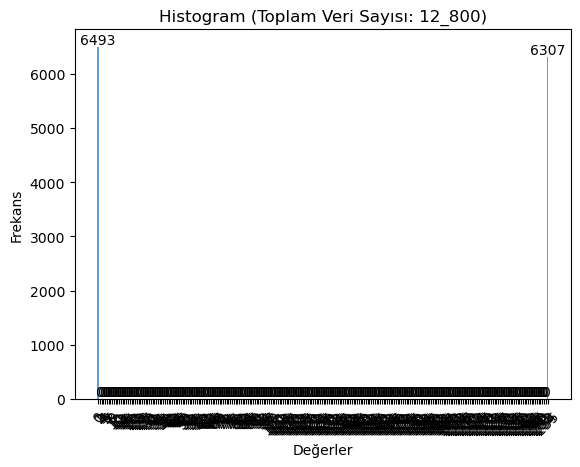

Ki-kare değeri: 1625945.96


In [68]:
threshold = ki_kare_test_and_hist(threshold_values, k_min = 0, k_max = 255, step = 1)
print(f"Ki-kare değeri: {threshold}")

##### 4. Sin Fonksiyonu

In [69]:
# Dizinin oluşturulması
sin_values = np.zeros(n_iterations)

for i in range(1, n_iterations + 1):
    sin_values[i-1] = int((np.sin(2 * np.pi * key_values[i-1]) + 1) * 50) % n

In [70]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_256_12_800/Sin_Values.txt", "w") as file:
    for item in sin_values:
        file.write(f"{int(item)}\n")

In [71]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/n] * n

# Gözlenen frekansları hesapla (0'dan 15'a kadar olan sayılar için)
observed = [np.sum(sin_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [561, 249, 192, 135, 148, 152, 120, 99, 115, 119, 99, 97, 87, 100, 82, 89, 93, 95, 88, 81, 71, 102, 93, 90, 75, 81, 81, 98, 77, 87, 65, 79, 97, 88, 76, 89, 90, 98, 111, 96, 113, 106, 118, 127, 126, 138, 153, 160, 203, 518, 528, 227, 202, 135, 128, 126, 115, 114, 115, 97, 93, 104, 96, 94, 83, 83, 86, 78, 96, 81, 85, 88, 80, 83, 88, 98, 89, 92, 93, 100, 89, 101, 91, 114, 81, 92, 84, 108, 93, 115, 127, 111, 110, 161, 127, 139, 159, 189, 249, 576, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


##### Sin --- p_value Değerinin Değerinin Hesaplanması

In [72]:
chi2_stat = calculate_chi2_stat(observed, expected)
calculate_p_value(chi2_stat, df)

0.0

##### Sin --- Ki-Kare Testi ve Histogramın Çizilmesi

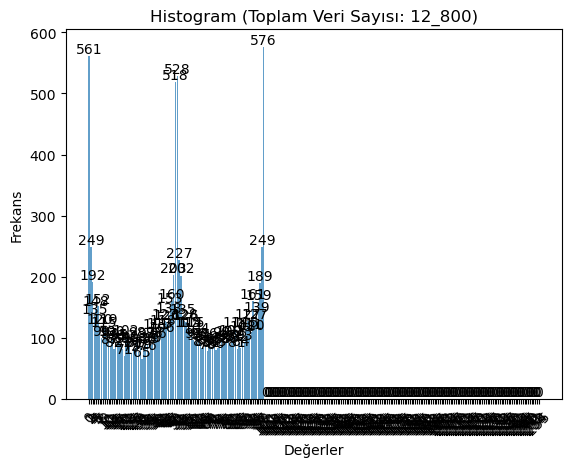

Ki-kare değeri: 37145.919999999984


In [73]:
sin = ki_kare_test_and_hist(sin_values, k_min = 0, k_max = 255, step = 1)
print(f"Ki-kare değeri: {sin}")

##### 5. Lineer Fonksiyon

In [74]:
# Başlangıç değerlerinin verilmesi
a = 1.5
b = -0.5

In [75]:
# Dizinin oluşturulması
lts_values = np.zeros(n_iterations)
for i in range(1, n_iterations + 1):
    lts_values[i-1] = (np.floor((a * key_values[i-1] + b) * 100)) % n

In [76]:
# Elde edilen değerlerin txt dosyasına yazdırılması
with open("Output/Mod_256_12_800/Lineer_Values.txt", "w") as file:
    for item in lts_values:
        file.write(f"{int(item)}\n")

In [77]:
# Mevcut bekelenen 256.000 elemanlı dizi
expected = [n_iterations/n] * n

# Gözlenen frekansları hesapla (0'dan 15'a kadar olan sayılar için)
observed = [np.sum(lts_values == i) for i in range(n)]
print (f"Gözlemlenen frekanslar (observed): {observed}")

Gözlemlenen frekanslar (observed): [61, 52, 64, 50, 59, 48, 49, 67, 60, 67, 67, 61, 66, 54, 56, 62, 44, 56, 51, 57, 49, 46, 58, 52, 57, 63, 65, 51, 66, 51, 48, 44, 55, 54, 52, 59, 54, 52, 50, 73, 47, 41, 46, 47, 51, 54, 64, 65, 51, 60, 61, 53, 63, 49, 55, 40, 63, 60, 57, 56, 58, 63, 49, 62, 69, 58, 61, 65, 52, 83, 67, 51, 70, 84, 66, 61, 75, 86, 60, 68, 80, 83, 109, 101, 74, 92, 112, 93, 112, 93, 93, 115, 120, 129, 172, 167, 193, 212, 254, 675, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 721, 288, 202, 189, 163, 143, 134, 112, 118, 107, 111, 95, 102, 105, 86, 90, 103, 92, 82, 76, 80, 93, 84, 77, 72, 80, 56, 72, 61, 55, 71, 70, 69, 56, 68, 45, 56, 66, 65, 47, 58, 77, 45, 68, 59, 70, 55, 44, 63, 79]


##### Lineer --- p_value Değerinin Değerinin Hesaplanması

In [78]:
chi2_stat = calculate_chi2_stat(observed, expected)
calculate_p_value(chi2_stat, df)

0.0

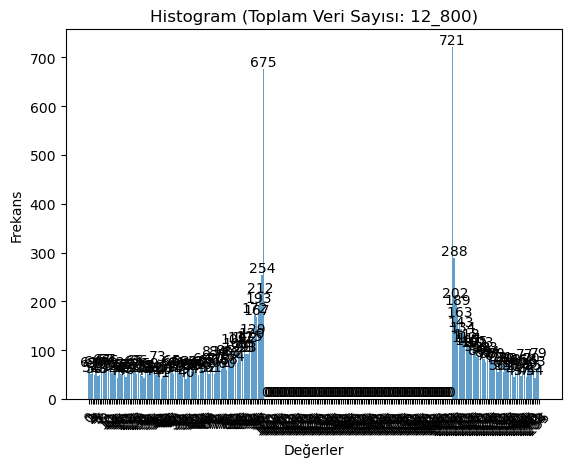

Ki-kare değeri: 28899.36


In [79]:
lts = ki_kare_test_and_hist(lts_values, k_min = 0, k_max = 255, step = 1)
print(f"Ki-kare değeri: {lts}")